# Predict Brand Safety of an User ID on Social Media

In [1]:
from IPython.display import Image
import predict as predict
import matplotlib.pyplot as plt

Brand safety is to make sure that a business’s ads aren’t associated with inappropriate content that could damage the brand’s reputation. The product is a model which classify whether an user ID is safe foor buisinees to post ads.

It is challenge to make sure brand-safe on social media. Unlike newspaper, magazine, Social media space often made up of lots of smaller content creators. Also considering most ads bought programmatically, there’s definitely not time for a human to check out if the ad will be placed alongside inappropriate content. Program to check before ads posting would be useful.

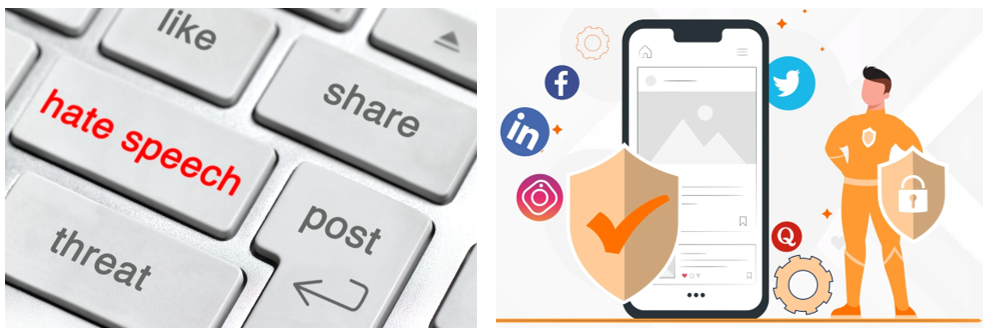

In [2]:
Image(filename='brandsafety1.png')

Therefore, we built a project to classify whether a social media user is okay for business to post ads, based on the user’s post. This can be used as a 3rd party verification tool to reduce brand risk

### Pre-Train Model

First we use a pre-labeled data-set from kaggle, where the comments are classified as obscene, insult, toxic, severe_toxic, identity_hate, threat. We build a multi-label classifier using logistic regression. An sample of training data set is shown below.

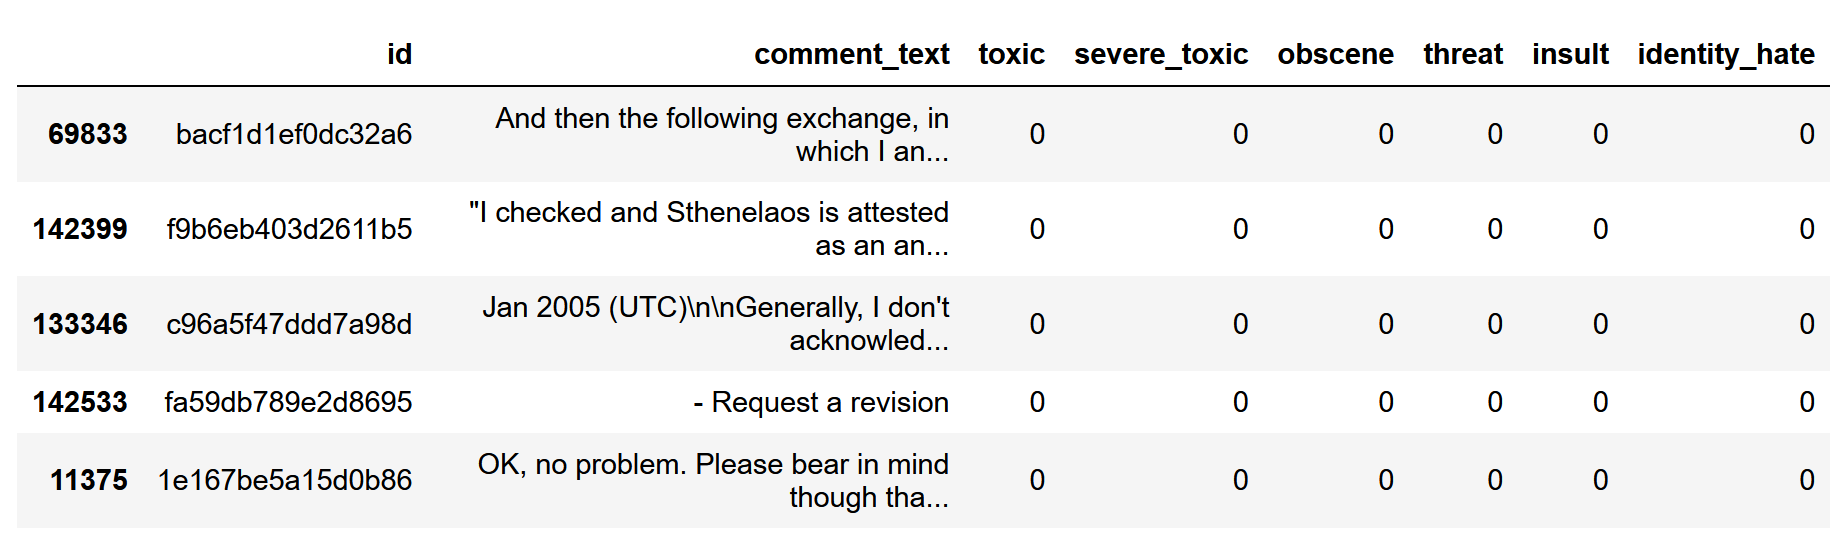

In [3]:
Image(filename='traindf.png')

Firstly, we cleaned up the comment_text abbreviation for easier processing, then vecterized text using TfidfVectorizer with 5000 max features. Logistic regression hyperparameter C parameter is used as regularization terms to control penalty strength. C parameter value is chosen to be 12 after grid search using cross-validation where number of folds is 10.

Model trained on pre-labeled data-set was saved as pre-trained model, for easy and fast useage later. Model performance is shown as below. Model precision is good for most of categories but recall need to be improved further. 

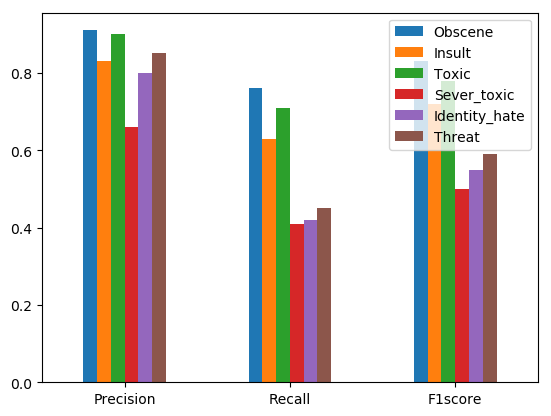

In [3]:
Image(filename='MLperformance.png')

### Predict with Reddit UserID

After the model is trained, we use reddit platform to do demo. using reddit API to pull out most recent post/comments of a user ID.

For example, we can use reddit user '0U8124X' as an sample. You can also type in whoever you want to check!

In [4]:
usid = '0U8124X'#'MrPatch'
full_df, filter_df,score_df, score = predict.main_predict(usid)

Version 7.7.0 of praw is outdated. Version 7.7.1 was released 5 days ago.


The plot below shows how many percentage of post/comments fall into non brand safe categories. We use 0.3 as threshold to determine whether a post is brand-safe. 

<BarContainer object of 6 artists>

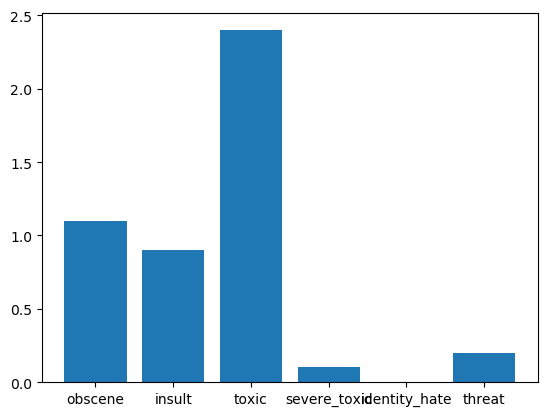

In [5]:
plt.bar(score_df.columns, score_df.loc['percentage',:])

Score refers to 2.4% of post/comments are not brand-safe. So you don't want to advertize anywhere near this user!

In [6]:
score

'2.4%'